In [18]:
#New model from the transformers i will use pipeline functions
import warnings
from transformers import pipeline

- Load the data of the resturant_Reviews fro the customers:

In [19]:
import pandas as pd
resturant_Rev=pd.read_csv("/kaggle/input/restaurant-reviews/Restaurant_Reviews.csv")
resturant_Rev.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


- Check the missing values in the columns:

In [20]:
resturant_Rev.isnull().sum()

Review    0
Liked     0
dtype: int64

- Check the duplicated values in the data

In [21]:
resturant_Rev.duplicated().sum()

6

- We have 6 duplicated values not effected in the results of the model.

In [22]:
row,column = resturant_Rev.shape
print("thee number of rows :",row)
print("the number of the column :",column)

thee number of rows : 1000
the number of the column : 2


- Drop the unneeded column:

In [23]:
resturant_Rev.drop('Liked',axis=1,inplace=True)
resturant_Rev.head()

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...


- The firs model of the pipeline function is sentiment-analysis
- It helps us to know the reaction of the text and giving us label negatve or positive of the reviews of the customers and add the labels of output in the new column

In [24]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    type_rev=pipeline("sentiment-analysis")
    resturant_Rev['impression']=resturant_Rev['Review'].apply(lambda x:type_rev(x)[0]['label'])
    print(resturant_Rev)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                                                Review impression
0                             Wow... Loved this place.   POSITIVE
1                                   Crust is not good.   NEGATIVE
2            Not tasty and the texture was just nasty.   NEGATIVE
3    Stopped by during the late May bank holiday of...   POSITIVE
4    The selection on the menu was great and so wer...   POSITIVE
..                                                 ...        ...
995  I think food should have flavor and texture an...   NEGATIVE
996                           Appetite instantly gone.   NEGATIVE
997  Overall I was not impressed and would not go b...   NEGATIVE
998  The whole experience was underwhelming, and I ...   NEGATIVE
999  Then, as if I hadn't wasted enough of my life ...   NEGATIVE

[1000 rows x 2 columns]


- show the dataframe of the data

In [25]:
resturant_Rev.head()

,Review,impression
0,Wow... Loved this place.,POSITIVE
1,Crust is not good.,NEGATIVE
2,Not tasty and the texture was just nasty.,NEGATIVE
3,Stopped by during the late May bank holiday of...,POSITIVE
4,The selection on the menu was great and so wer...,POSITIVE


- plot the number of reviews positive or negative from the customers, they visited the Restaurant: 

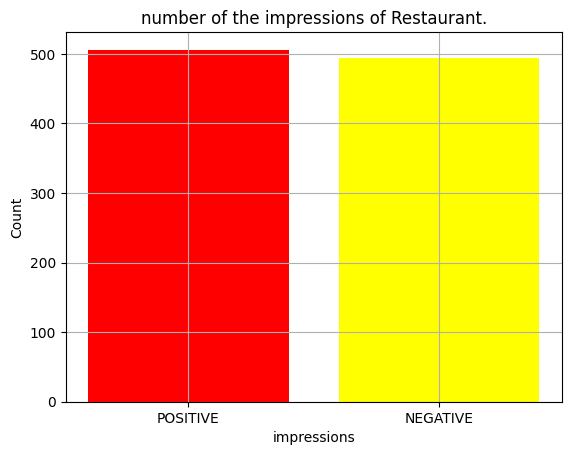

In [26]:
import matplotlib.pyplot as plt
compare=resturant_Rev['impression'].value_counts()
# Plot the bar chart
plt.bar(compare.index, compare.values, color=['red', 'yellow'])
plt.grid()
plt.xlabel('impressions')
plt.ylabel('Count')
plt.title('number of the impressions of Restaurant.')
plt.show()

- we can show the number of positive impressions greater than the number of the negative impressions but the difference between them not big the Restaurant should get better and improve it to get more positive impression 

- The second model in the pipeline function is the zero-shot-classification,it helps us to now the main idea of the text nad can predict the accuracy of the all labels you give it and print it 

In [27]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    classifier=pipeline("zero-shot-classification")
    classifier=classifier("The latest technology trends are reshaping the way we live and work. Artificial intelligence, machine learning, and automation are becoming integral parts of various industries. With advancements in technology, there's a growing need for professionals with expertise in these areas. Stay updated to remain competitive in the ever-evolving tech landscape.",
     candidate_labels=["education",'politics','business'])
    print(classifier)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': "The latest technology trends are reshaping the way we live and work. Artificial intelligence, machine learning, and automation are becoming integral parts of various industries. With advancements in technology, there's a growing need for professionals with expertise in these areas. Stay updated to remain competitive in the ever-evolving tech landscape.", 'labels': ['business', 'education', 'politics'], 'scores': [0.8240236639976501, 0.13338200747966766, 0.04259428381919861]}


- At the above cell i give to it text and give to it the labels i need to test and know the accuracy of each label, from that prediction i can show from the text belong to any field of them.

Third model is the text-generation in the pipeline function and it helps us to generate more sentence and make new text.

In [28]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    generator=pipeline("text-generation")
    generatiion=generator("in the transformers course we will learn models")
    print(generatiion)

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'in the transformers course we will learn models of the complex behavior of the cells in the brain, and how they relate to the neuronal response and in vivo synaptic activity during different brain waves. We will use an approach that combines neuroscience and computational techniques for'}]


Fourth model is the ner in the pipeline function it helps us to know the important words in the text and classify it 

In [35]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    nero=pipeline("ner",grouped_entities=True)
    ner =nero("I am chatgpt, a product of OpenAI. I'm a machine learning model based on the GPT-3.5 architecture, capable of generating human-like text based on the input I receive. My primary function is to assist and provide information to the best of my abilities. I don't have personal experiences, opinions, or consciousness. If you have any questions or need assistance, feel free to ask, and I'll do my best to hel")
    print(ner)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity_group': 'ORG', 'score': 0.55159837, 'word': '##pt', 'start': 10, 'end': 12}, {'entity_group': 'ORG', 'score': 0.9802092, 'word': 'OpenAI', 'start': 27, 'end': 33}, {'entity_group': 'MISC', 'score': 0.6671639, 'word': 'GPT', 'start': 77, 'end': 80}, {'entity_group': 'MISC', 'score': 0.5669795, 'word': '5', 'start': 83, 'end': 84}]


- The fifth model is the "fill-mask" in the pipeline sunction, it helps us to fill the space in the text by generate word in this space and fill it thats good to help us to pedict the correct answer and fill it in the space.

In [30]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    masker=pipeline("fill-mask",)
    mask =masker("I am <mask>, a product of OpenAI. I'm a machine learning model based on the GPT-3.5 architecture, capable of generating human-like text based on the input I receive. My primary function is to assist and provide information to the best of my abilities. I don't have personal experiences, opinions, or consciousness. If you have any questions or need assistance, feel free to ask, and I'll do my best to help!",top_k=3)
    print(mask)

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.017969364300370216, 'token': 11450, 'token_str': ' Julia', 'sequence': "I am Julia, a product of OpenAI. I'm a machine learning model based on the GPT-3.5 architecture, capable of generating human-like text based on the input I receive. My primary function is to assist and provide information to the best of my abilities. I don't have personal experiences, opinions, or consciousness. If you have any questions or need assistance, feel free to ask, and I'll do my best to help!"}, {'score': 0.015346796251833439, 'token': 2185, 'token_str': ' myself', 'sequence': "I am myself, a product of OpenAI. I'm a machine learning model based on the GPT-3.5 architecture, capable of generating human-like text based on the input I receive. My primary function is to assist and provide information to the best of my abilities. I don't have personal experiences, opinions, or consciousness. If you have any questions or need assistance, feel free to ask, and I'll do my best to help!"}, {'score': 

- The sixth model is the question-answering in the pipeline function , it can help us to answer the questions i need to know it from the text,how? by sive to them the question and the text .

In [31]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    answer=pipeline("question-answering")
    answer1=answer(question="Who I am?",
    context= "I am ChatGPT, a product of OpenAI. I'm a machine learning model based on the GPT-3.5 architecture, capable of generating human-like text based on the input I receive. My primary function is to assist and provide information to the best of my abilities. I don't have personal experiences, opinions, or consciousness. If you have any questions or need assistance, feel free to ask, and I'll do my best to help!")
    answer2=answer(question="What I can do?",
    context= "I am ChatGPT, a product of OpenAI. I'm a machine learning model based on the GPT-3.5 architecture, capable of generating human-like text based on the input I receive. My primary function is to assist and provide information to the best of my abilities. I don't have personal experiences, opinions, or consciousness. If you have any questions or need assistance, feel free to ask, and I'll do my best to help!")
    print(answer1,'\n',answer2)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.9102134108543396, 'start': 5, 'end': 12, 'answer': 'ChatGPT'} 
 {'score': 0.06687399744987488, 'start': 190, 'end': 251, 'answer': 'to assist and provide information to the best of my abilities'}


- The seventh model is the summarization in the pipeline function ,it helps us to summarize any text i give it . 

In [32]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    answer=pipeline("summarization")
    summarize=answer("I am ChatGPT, a product of OpenAI. I'm a machine learning model based on the GPT-3.5 architecture, capable of generating human-like text based on the input")
    print(summarize)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 142, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[{'summary_text': " ChatGPT is a machine learning model based on the GPT-3.5 architecture, capable of generating human-like text . It is a product of OpenAI, a machine-learning model that can generate text based on a user's input . The model is based on an OpenAI-based architecture ."}]


- The eights model is translation in the pipeline function and it helps us to translate any text from langauge to another langauge by choose the model of the translation i need to use it.

In [33]:
from transformers import pipeline
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    translation_pipeline = pipeline("translation", model="Helsinki-NLP/opus-mt-en-ROMANCE", tokenizer="Helsinki-NLP/opus-mt-en-ROMANCE")
    text_to_translate = "Hello, how are you?"
    translated_text = translation_pipeline(text_to_translate)
    print("Original Text:", text_to_translate)
    print("Translated Text (to French):", translated_text[0]['translation_text'])


Original Text: Hello, how are you?
Translated Text (to French): Bonjour, comment allez-vous?
